In [398]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 22 13:11:24 2020

@author: Lappawat
"""
import numpy as np
import matplotlib.pyplot as plt

### Real data
real_infected = [100,103,106,113,115,124,141,146,147,177,212,272,322,411,599,721]
date = np.arange(0,len(real_infected))




In [399]:
############### Parameters ##########################
infected  = 100   # initial infected people
length    = 365     # predicted length (days)
meeting   = 15    # 1 infected people can meet 20 people
threshold = 3     # if covid_test score more than threshold, then he will be infected
healed_day= 21       # infected people will be healed in 7 days after being infected

Pop_total = 60000000
Pop_type  = [0,1,2,3,4]
Pop_ratio = [0.1,0.2,0.4,0.3] # population in each classes
#R_lst     = [0.1,0.3,1.2,2.2,0.0] contact rate
R_lst     = [0.1,0.3,0.2,2.0,0.0] # contact rate
# Define 5 classes of people depending on how to response
# 0 H = (Highy responsible)
# 1 M = (Moderately responsible)
# 2 N = (Normal)
# 3 R = (Risky)
# 4 I = (Infected/Immuned)

Pop       = np.array(Pop_ratio)*Pop_total
Pop       = np.append(Pop,0)
#print(Pop)
covid_type_last_day= np.random.choice([0,1,2,3],size=infected,p=Pop_ratio)
for i in covid_type_last_day:
    Pop[i]=Pop[i]-1 
    Pop[4]=Pop[4]+1
print(Pop)
Pop_ratio = Pop/Pop_total
#print(Pop_ratio)

[5.9999910e+06 1.1999983e+07 2.3999952e+07 1.7999974e+07 1.0000000e+02]


In [400]:
#zeroth day
day = [0]
covid_infected_day = [infected]
covid_infected_tot = [infected]
covid_healed_day   = [0]
covid_healed_tot   = [0]
covid_tot          = [infected]

#begin model
for i in range(length):
    #print(Pop)
    #print(covid_type_last_day)
    # Model the meeting between infected people and other people
    covid_type_today = []   # Today cases
    for j in range(len(covid_type_last_day)):
        ## transmitter
        T_type = covid_type_last_day[j]
        Rt     = R_lst[T_type]
        for k in range(meeting):
            ## receptor
            R_type = np.random.choice(Pop_type,p=Pop_ratio)
            Rr = R_lst[R_type]
            # meeting
            covid_test = Rt * Rr * np.random.uniform(0,1)
            #print(T_type, R_type, covid_test)
            if covid_test > threshold:
                Pop[R_type] = Pop[R_type]-1
                Pop[4] = Pop[4]+1
                Pop_ratio = Pop/Pop_total
                covid_type_today.append(R_type)
    
    #i_th day
    day.append(i+1)
    
    # infected cases
    covid_type_last_day = covid_type_today 
    covid_infected_day.append(len(covid_type_today))
    covid_infected_tot.append(covid_infected_tot[-1]+covid_infected_day[-1])
    
    # healed cases
    if i< healed_day:
        covid_healed_day.append(0) 
    else:
        covid_healed_day.append(covid_infected_day[i-healed_day])  # healed people
    covid_healed_tot.append(covid_healed_tot[-1]+covid_healed_day[-1])
    
    # net cases
    covid_tot.append(covid_infected_tot[-1]-covid_healed_tot[-1])     
    

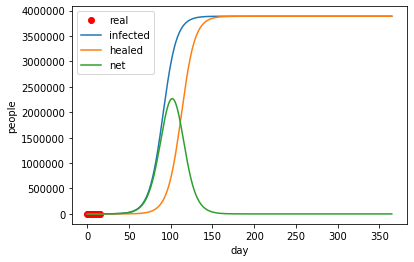

In [401]:
plt.plot(date, real_infected, 'ro', label='real')
plt.plot(day,covid_infected_tot,'-',label ="infected")
plt.plot(day,covid_healed_tot,'-',label ="healed")
plt.plot(day,covid_tot,'-',label ="net")
plt.xlabel('day')
plt.ylabel('people')
plt.legend()
plt.show()

    